In [1]:
import pandas as pd #used for data manipulation and analysis. Dataframe creation.
import seaborn as sns #for plotting graphs

In [2]:
wine = pd.read_csv('winequality-red.csv')
#downloaded from UCI ML repository

# Data Analysis

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are no missing values and null values in the dataset. The dataset looks clean.

In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Observing the statistics for the response variable quality, it appears to be highly imbalanced. To confirm our inference, we plot a bar graph.

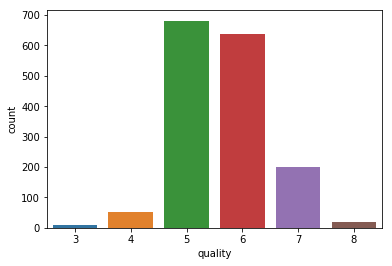

In [6]:
sns.countplot(wine['quality'])

Clearly, the response variable 'quality' is non-uniformly distributed. There is a very high concentration of "average" wines and a very low concentration of "low" and "high" quality wines.

For now, we will consider this as a binary classification problem and apply three different classification algorithms. We will compare and evaluate the models on the basis of precision, recall and Area under ROC curve.

In [7]:
#Splitting response variable quality into bins. Wines with quality greater than 7 are considered high quality. The rest are considered low.
bins = (2, 6.5, 8)
group_names = ['low', 'high']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

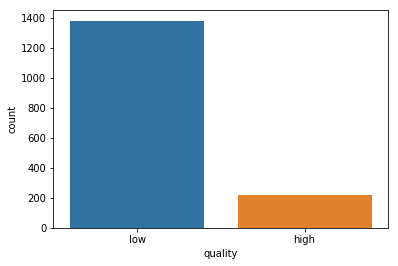

In [8]:
sns.countplot(wine['quality'])

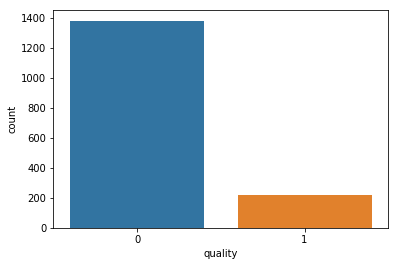

In [9]:
#Encoding labels. Low : 0, High: 1 for modelling.
wine['quality']=wine['quality'].cat.codes
sns.countplot(wine['quality'])

In [10]:
#We create a separate dataframe without the response variable quality 
wine_model = wine.drop('quality', axis=1)
wine_quality = wine['quality']

In [11]:
#random_state is used to guarantee that the output of Run 1 is always equal to the output of Run 2 i.e the split is always the same.
from sklearn.model_selection import train_test_split
wm_train, wm_test, wq_train, wq_test = train_test_split(wine_model,wine_quality,test_size=0.25, random_state=42)

# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(wm_train,wq_train)

C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
wq_pred = logreg.predict(wm_test)

Confusion matrix format - 
             Predicted LOW      Predicted HIGH
Actual LOW      TN                  FP
Actual HIGH     FN                  TP

In [14]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(wq_test,wq_pred)
cnf_matrix

array([[339,   8],
       [ 41,  12]], dtype=int64)

Accuracy = True Positives / Total
Accuracy not a good measure for this scenario as dataset is imbalanced. Eg - Out of 100, 90 wines are low quality. So, naively, an accuracy of around 90% can be obtained.

Precision = True Positives /(True Positives + False Positives)
Precision means what proportion of wines which were classified as low quality were actually low.
In easy terms, jo wines ko low quality bataya model ne, unmein se kitni actually low quality hain.
So, Precision = 12/12+8 = 12/20 = 60%

Recall = True Positives /(True Positives + False Negatives)
Recall means sensitivity. It tells us what proportion of low quality wines were actually classified as low quality.
In easy terms, jo wines humein pata hai low quality hain, unmein se kitnon ko humaare model ne low quality bataya.
Recall = 12/12+41 = 22%

In [15]:
print("Accuracy:",metrics.accuracy_score(wq_test,wq_pred))
print("Precision:",metrics.precision_score(wq_test,wq_pred))
print("Recall:",metrics.recall_score(wq_test,wq_pred))



Accuracy: 0.8775
Precision: 0.6
Recall: 0.22641509433962265


Area under Receiver Operating Characteristic curve. Quite useful evaluation metric when class is imbalanced. 
Value lies between 0.5 - 1. 1 means perfect classifier. 0.5 means worthless classifier.

In [16]:
wq_pred_prob = logreg.predict_proba(wm_test)[::,1]
print("Area under ROC curve score :",metrics.roc_auc_score(wq_test,wq_pred_prob))

Area under ROC curve score : 0.8754281985753902


# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(wm_train, wq_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
wq_pred_dt = classifier.predict(wm_test)

In [19]:
cnf_matrix = metrics.confusion_matrix(wq_test,wq_pred_dt)
cnf_matrix

array([[320,  27],
       [ 18,  35]], dtype=int64)

In [20]:
print(metrics.classification_report(wq_test,wq_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       347
           1       0.56      0.66      0.61        53

   micro avg       0.89      0.89      0.89       400
   macro avg       0.76      0.79      0.77       400
weighted avg       0.90      0.89      0.89       400



In [21]:
print("Accuracy:",metrics.accuracy_score(wq_test,wq_pred_dt))
print("Precision:",metrics.precision_score(wq_test,wq_pred_dt))
print("Recall:",metrics.recall_score(wq_test,wq_pred_dt))


Accuracy: 0.8875
Precision: 0.5645161290322581
Recall: 0.660377358490566


In [22]:
wq_pred_prob = classifier.predict_proba(wm_test)[::,1]
print("Area under ROC curve score :",metrics.roc_auc_score(wq_test,wq_pred_prob))

Area under ROC curve score : 0.7912837801098362


# Random Forest 

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(wm_train,wq_train)
pred_rfc = rfc.predict(wm_test)

In [29]:
cnf_matrix = metrics.confusion_matrix(wq_test,pred_rfc)
print(cnf_matrix)
print(metrics.classification_report(wq_test,pred_rfc))
print("Accuracy:",metrics.accuracy_score(wq_test,pred_rfc))
print("Precision:",metrics.precision_score(wq_test,pred_rfc))
print("Recall:",metrics.recall_score(wq_test,pred_rfc))
wq_pred_prob = classifier.predict_proba(wm_test)[::,1]
print("Area under ROC curve score :",metrics.roc_auc_score(wq_test,wq_pred_prob))

[[332  15]
 [ 26  27]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       347
           1       0.64      0.51      0.57        53

   micro avg       0.90      0.90      0.90       400
   macro avg       0.79      0.73      0.76       400
weighted avg       0.89      0.90      0.89       400

Accuracy: 0.8975
Precision: 0.6428571428571429
Recall: 0.5094339622641509
Area under ROC curve score : 0.7912837801098362


# Improving accuracy of Random forest using cross validation score

In [49]:
rfc_eval = cross_val_score(estimator = rfc, X = wm_train, y = wq_train, cv = 10)
print("Impoved RF accuracy : ",rfc_eval.mean())

Impoved RF accuracy :  0.914154455170498


# Stochastic Gradient Descent Classifier

In [34]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(penalty=None)
sgd.fit(wm_train, wq_train)
pred_sdg = sgd.predict(wm_test)
cnf_matrix = metrics.confusion_matrix(wq_test,pred_sdg)
print(cnf_matrix)
print(metrics.classification_report(wq_test,pred_sdg))
print("Accuracy:",metrics.accuracy_score(wq_test,pred_sdg))
print("Precision:",metrics.precision_score(wq_test,pred_sdg))
print("Recall:",metrics.recall_score(wq_test,pred_sdg))
wq_pred_prob1 = classifier.predict_proba(wm_test)[::,1]
print("Area under ROC curve score :",metrics.roc_auc_score(wq_test,wq_pred_prob1))

[[333  14]
 [ 42  11]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       347
           1       0.44      0.21      0.28        53

   micro avg       0.86      0.86      0.86       400
   macro avg       0.66      0.58      0.60       400
weighted avg       0.83      0.86      0.84       400

Accuracy: 0.86
Precision: 0.44
Recall: 0.20754716981132076
Area under ROC curve score : 0.7912837801098362


C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


# Support Vector Machine

In [35]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(wm_train, wq_train)
pred_svc = svc.predict(wm_test)
cnf_matrix = metrics.confusion_matrix(wq_test,pred_svc)
print(cnf_matrix)
print(metrics.classification_report(wq_test,pred_svc))
print("Accuracy:",metrics.accuracy_score(wq_test,pred_svc))
print("Precision:",metrics.precision_score(wq_test,pred_svc))
print("Recall:",metrics.recall_score(wq_test,pred_svc))
wq_pred_prob2 = classifier.predict_proba(wm_test)[::,1]
print("Area under ROC curve score :",metrics.roc_auc_score(wq_test,wq_pred_prob2))

[[339   8]
 [ 43  10]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       347
           1       0.56      0.19      0.28        53

   micro avg       0.87      0.87      0.87       400
   macro avg       0.72      0.58      0.61       400
weighted avg       0.84      0.87      0.84       400

Accuracy: 0.8725
Precision: 0.5555555555555556
Recall: 0.18867924528301888
Area under ROC curve score : 0.7912837801098362


C:\Users\Mahe\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Improving accuracy of model using Grid Search CV

In [44]:
#Finding best parameters for our SVC model
from sklearn.model_selection import GridSearchCV, cross_val_score
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [46]:
#Takes a looooooong time to run
#grid_svc.fit(wm_train, wq_train)
#grid_svc.best_params_
#Calculated parameters are - C = 1.2, gamma =  0.9, kernel= 'rbf'

KeyboardInterrupt: 

In [42]:
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(wm_train, wq_train)
pred_svc2 = svc2.predict(wm_test)
cnf_matrix = metrics.confusion_matrix(wq_test,pred_svc2)
print(cnf_matrix)
print(metrics.classification_report(wq_test,pred_svc2))
print("Accuracy:",metrics.accuracy_score(wq_test,pred_svc2))
print("Precision:",metrics.precision_score(wq_test,pred_svc2))
print("Recall:",metrics.recall_score(wq_test,pred_svc2))
wq_pred_prob3 = classifier.predict_proba(wm_test)[::,1]
print("Area under ROC curve score :",metrics.roc_auc_score(wq_test,wq_pred_prob3))

[[346   1]
 [ 38  15]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       347
           1       0.94      0.28      0.43        53

   micro avg       0.90      0.90      0.90       400
   macro avg       0.92      0.64      0.69       400
weighted avg       0.91      0.90      0.88       400

Accuracy: 0.9025
Precision: 0.9375
Recall: 0.2830188679245283
Area under ROC curve score : 0.7912837801098362
